## Praca domowa 4

#### Autor: Antoni Zajko

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [2]:
df.query('Year > 2015 and Publisher == \'Nintendo\' and NA_Sales < EU_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [4]:
df.query('Year == 2010').groupby('Genre', as_index = False).agg({'Global_Sales': np.sum}). \
sort_values('Global_Sales', ascending = False).head(1)

,Genre,Global_Sales
0,Action,117.64


c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [5]:
df.groupby('Genre', as_index = False). \
    agg({'JP_Sales': np.mean, 'EU_Sales': np.mean}). \
    query('JP_Sales > EU_Sales'). \
    loc[:, ['Genre', 'JP_Sales']]. \
    rename(columns = {'Genre': 'Typ gry', 'JP_Sales': 'Średnia sprzedaż w Japonii'}). \
    sort_values('Średnia sprzedaż w Japonii', ascending = False).reset_index(drop = True)

,Typ gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

### 1) Oryginalny wykres wraz ze źródłem

![Oryginanly wykres](https://galeria.bankier.pl/p/3/9/6716410b39f34a-948-461-0-0-1130-550.webp)


Źródło :<a href = https://www.bankier.pl/wiadomosc/Inflacja-zjada-zarobki-deweloperzy-wciskaja-hamulec-a-ceny-paliw-bija-kolejne-rekordy-Wykresy-tygodnia-8210330.html> https://www.bankier.pl/wiadomosc/Inflacja-zjada-zarobki-deweloperzy-wciskaja-hamulec-a-ceny-paliw-bija-kolejne-rekordy-Wykresy-tygodnia-8210330.html</a>

## 2) Wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił
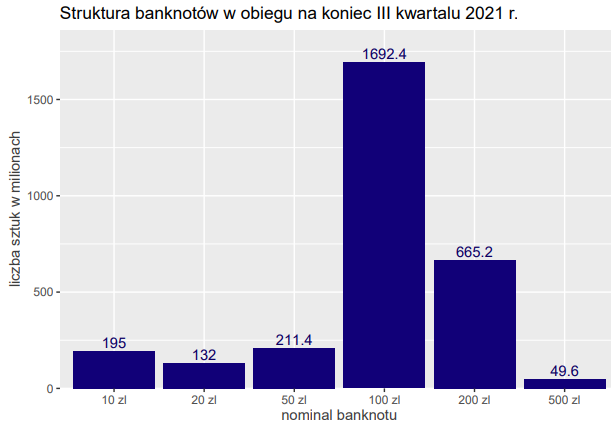
Link: <a href=https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/WojewodaMalwina/ZD2.pdf> https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/WojewodaMalwina/ZD2.pdf </a>


##  3) Poprawiony wykres z punktu 2) w Pythonie

In [6]:
import matplotlib.pyplot as plt

In [7]:
counts = [195, 132, 211.4, 1692.4, 665.2, 49.6]
bills = ['10 zł', '20 zł', '50 zł', '100 zł', '200 zł', '500 zł']

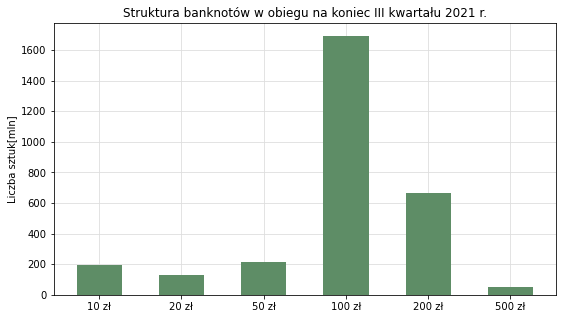

In [8]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.figsize'] = (9, 5)
plt.grid(color = '#DDDDDD')
plt.bar(x = bills, height = counts, color = '#5E8D66', width = .55)
plt.title('Struktura banknotów w obiegu na koniec III kwartału 2021 r.')
plt.ylabel('Liczba sztuk[mln]')
plt.show()

## 4) Uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Utworzony przeze mnie wykres jest lepszy od pierwotnego, ponieważ nie jest kołowy i dane na nim są znacznie bardziej czytelne. Ponadto nie ma kodowania tego samego aspektu danych wielokrotnie jak na tamtym wykresie np. podział na nominały został zakodowany poprzez kolor, oraz podpisy na wykresie.

Jeśli chodzi o wykres z hw2, to mój jest lepszy pod względem estetycznym. Po pierwsze uważam, że dobrany przeze mnie kolor jest dużo przyjaźniejszy dla oka. Ponadto siatka w tle dużo lepiej komponuje się z całością. Usunąłem podpisy wartości na słupkach, gdyż uważam, że dokładne wartości nie są aż tak bardzo istotne na tym wykresie, bo jego rolą jest ukazanie ogólnej struktury banknotów, a nie ile dokładnie jest każdego z nich. Słupki są nieco węższe przez co słupek reprezentujący 500 zł wygląda nieco lepiej, oraz różnice w wysokościach słupków są bardziej widoczne. Wprowadzone przeze mnie zmiany nie wpłynęły znacząco na czytelność danych, jednakże znacząco poprawiły estetykę wykresu.